In [1]:
import pandas as pd
import geopandas as gpd
import os

# new import statements
from sklearn.linear_model import LinearRegression

# ML Overview

#### Covid deaths analysis

- Source: https://data.dhsgis.wi.gov/
    - Specifically, let's analyze "COVID-19 Data by Census Tract V2"

In [2]:
# Do not reptitivitely download large datasets
# Save a local copy instead
if os.path.exists("covid.geojson"):
    print("Reading local file.")
    df = gpd.read_file("covid.geojson")
else:
    print("Downloading the dataset.")
    url = "https://dhsgis.wi.gov/server/rest/services/DHS_COVID19/COVID19_WI_V2/MapServer/9/query?outFields=*&where=1%3D1&f=geojson"
    df = gpd.read_file(url)
    df.to_file("covid.geojson")

Reading local file.


In [3]:
df.head()

,RptDt,GEOID,GEOName,POS_CUM_CP,POS_NEW_CP,POS_7DAYAVG_CP,DTH_CUM_CP,DTH_NEW_CP,DTH_7DAYAVG_CP,DTH_OVER_30DAYS_CP,...,HOSP_NO_CP,HOSP_UNK_CP,Date,POP,POP_MOE,OBJECTID,GEO,Shape.STArea(),Shape.STLength(),geometry
0,1689793200000,55001950100,None,1041,0,0.0,13,0,0,0,...,626,361,1689660000000,2870,66.0,1829,Census tract,4.894706e+08,108089.745033,"POLYGON ((-89.72475 44.24769, -89.72492 44.247..."
1,1689793200000,55001950201,None,364,0,0.0,5,0,0,0,...,171,170,1689660000000,1244,96.0,1830,Census tract,2.277343e+08,97033.719846,"POLYGON ((-89.73892 43.98186, -89.73925 43.982..."
2,1689793200000,55001950202,None,673,0,0.0,8,0,0,0,...,390,262,1689660000000,2599,146.0,1831,Census tract,1.004937e+09,162456.681081,"POLYGON ((-89.90890 44.17627, -89.90907 44.176..."
3,1689793200000,55001950400,None,1442,0,0.0,26,0,0,0,...,704,649,1689660000000,4533,183.0,1832,Census tract,4.567996e+08,121861.166562,"POLYGON ((-89.73892 43.98186, -89.75025 43.981..."
4,1689793200000,55001950501,None,423,0,0.0,0,0,0,0,...,173,229,1689660000000,1603,133.0,1833,Census tract,2.575669e+08,77494.089221,"POLYGON ((-89.93773 43.96630, -89.93779 43.966..."


In [4]:
df.columns

Index(['RptDt', 'GEOID', 'GEOName', 'POS_CUM_CP', 'POS_NEW_CP',
       'POS_7DAYAVG_CP', 'DTH_CUM_CP', 'DTH_NEW_CP', 'DTH_7DAYAVG_CP',
       'DTH_OVER_30DAYS_CP', 'DTH_CP_Daily', 'TESTS_POS_CONF',
       'TESTS_POS_CONF_NEW', 'TESTS_POS_CONF_7DAYAVG', 'PercentNAATPos',
       'TESTS_CUM', 'TESTS_NEW', 'TESTS_7DAYAVG', 'POS_CUM_CONF',
       'POS_NEW_CONF', 'POS_7DAYAVG_CONF', 'POS_CUM_PROB', 'POS_NEW_PROB',
       'POS_7DAYAVG_PROB', 'DTH_CUM_CONF', 'DTH_NEW_CONF', 'DTH_7DAYAVG_CONF',
       'DTH_CONF_Daily', 'DTH_CUM_PROB', 'DTH_NEW_PROB', 'DTH_7DAYAVG_PROB',
       'DTH_PROB_Daily', 'POS_MALE_CP', 'POS_FEM_CP', 'POS_OTH_CP',
       'POS_0_9_CP', 'POS_10_19_CP', 'POS_20_29_CP', 'POS_30_39_CP',
       'POS_40_49_CP', 'POS_50_59_CP', 'POS_60_69_CP', 'POS_70_79_CP',
       'POS_80_89_CP', 'POS_90_CP', 'DTHS_FEM_CP', 'DTHS_MALE_CP',
       'DTHS_OTH_CP', 'DTHS_0_9_CP', 'DTHS_10_19_CP', 'DTHS_20_29_CP',
       'DTHS_30_39_CP', 'DTHS_40_49_CP', 'DTHS_50_59_CP', 'DTHS_60_69_CP',
       'DTH

<AxesSubplot:>

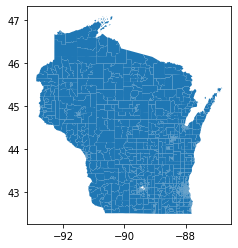

In [5]:
# Create a geographic plot
df.plot()

### How can we get a clean dataset of COVID deaths in WI?

In [6]:
# Replace -999 with 2; 2 is between 0-4; random choice instead of using 0
df = df.replace(-999, 2) 
# TODO: communicate in final results what percent of values were guessed (imputed)

<AxesSubplot:xlabel='POP', ylabel='DTH_CUM_CP'>

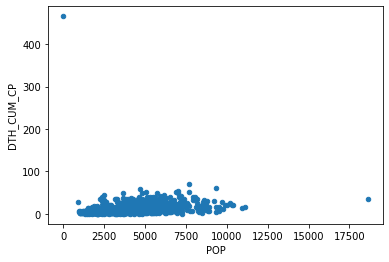

In [7]:
# Create a scatter plot to visualize relationship between "POP" and "DTH_CUM_CP"
df.plot.scatter(x="POP", y="DTH_CUM_CP")

Which points are concerning? Let's take a closer look.

#### Which rows have "DTH_CUM_CP" greater than 300?

In [8]:
df[df["DTH_CUM_CP"] > 300]

,RptDt,GEOID,GEOName,POS_CUM_CP,POS_NEW_CP,POS_7DAYAVG_CP,DTH_CUM_CP,DTH_NEW_CP,DTH_7DAYAVG_CP,DTH_OVER_30DAYS_CP,...,HOSP_NO_CP,HOSP_UNK_CP,Date,POP,POP_MOE,OBJECTID,GEO,Shape.STArea(),Shape.STLength(),geometry
1392,1689793200000,TRACT N/A,None,51014,6,5.0,466,0,0,0,...,22403,26664,1689660000000,0,NaN,1372,Census tract,466.180086,80.071546,"POLYGON ((-87.04159 44.13490, -87.04161 44.134..."


#### Valid rows have "GEOID" that only contains digits

Using `str` methods to perform filtering: `str.fullmatch` does a full string match given a reg-ex. Because it does full string match anchor characters (`^`, `$`) won't be needed.

In [9]:
df["GEOID"]

0       55001950100
1       55001950201
2       55001950202
3       55001950400
4       55001950501
           ...     
1388    55141011400
1389    55141011500
1390    55141011600
1391    55141011700
1392      TRACT N/A
Name: GEOID, Length: 1393, dtype: object

In [10]:
df["GEOID"].str.fullmatch(r"\d+")

0        True
1        True
2        True
3        True
4        True
        ...  
1388     True
1389     True
1390     True
1391     True
1392    False
Name: GEOID, Length: 1393, dtype: bool

<AxesSubplot:xlabel='POP', ylabel='DTH_CUM_CP'>

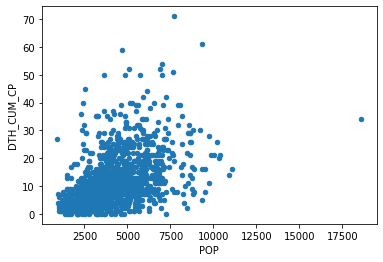

In [11]:
df = df[df["GEOID"].str.fullmatch(r"\d+")]
df.plot.scatter(x="POP", y="DTH_CUM_CP")

### How can we train/fit models to known data to predict unknowns?
- Feature(s) => Predictions
    - Population => Deaths
    - Cases => Deaths
    - Cases by Age => Deaths
    
- General structure for fitting models:
    ```python
    model = <some model>
    model.fit(X, y)
    y = model.predict(X)
    ```
    where `X` needs to be a matrix or a `DataFrame` and `y` needs to be an array (vector) or a `Series`

### Using "POP" as feature.

In [12]:
# We must specify a list of columns to make sure we extract a DataFrame and not a Series
# Feature DataFrame
df[["POP"]].head()

,POP
0,2870
1,1244
2,2599
3,4533
4,1603


In [13]:
# Label Series
df["DTH_CUM_CP"].head()

0    13
1     5
2     8
3    26
4     0
Name: DTH_CUM_CP, dtype: int64

### Let's use `LinearRegression` model.

- `from sklearn.linear_model import LinearRegression`
- Syntax: \
m = model \
m.fit(X, y) \
m.predict(X_pred)

In [14]:
model = LinearRegression()
model.fit(df[["POP"]], df["DTH_CUM_CP"])
# less interesting because we are predicting what we already know
y = model.predict(df[["POP"]])

Predicting for new values of x.

In [15]:
predict_df = pd.DataFrame({"POP": [1000, 2000, 3000]})
predict_df

,POP
0,1000
1,2000
2,3000


In [16]:
model.predict(predict_df)

array([4.00718049, 6.4417554 , 8.8763303 ])

In [17]:
predict_df["predicted deaths"] = model.predict(predict_df)
predict_df

,POP,predicted deaths
0,1000,4.007180
1,2000,6.441755
2,3000,8.876330
